# Text segmentation example

In [1]:
# Required modules
from trios.feature_extractors import RAWFeatureExtractor
import trios
import numpy as np
from TFClassifier import TFClassifier
from CNN_TFClassifier import CNN_TFClassifier
import scipy as sp
import scipy.ndimage
import trios.shortcuts.persistence as p
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

## Training examples
Training examples are defined through the Imageset class of TRIOSlib. The class defines a list of tuples with pairs of input and desired output image paths, and an (optional) binary image mask (see http://trioslib.sourceforge.net/index.html for more details). In this case, we use a training set with two training examples, and for each example, we define the mask as being the input image, that is, the operator is applied in each white pixel of the input image: 


sample 1:
	 input: images/veja2.sh50.png
	 desired output: images/veja2.sh50.ide.png
	 mask: images/veja2.sh50.png

sample 2:
	 input: images/veja4.sh50.png
	 desired output: images/veja4.sh50.ide.png
	 mask: images/veja4.sh50.png

sample 3:
	 input: images/veja7.sh50.png
	 desired output: images/veja7.sh50.ide.png
	 mask: images/veja7.sh50.png

The first pair of input and ouput examples:


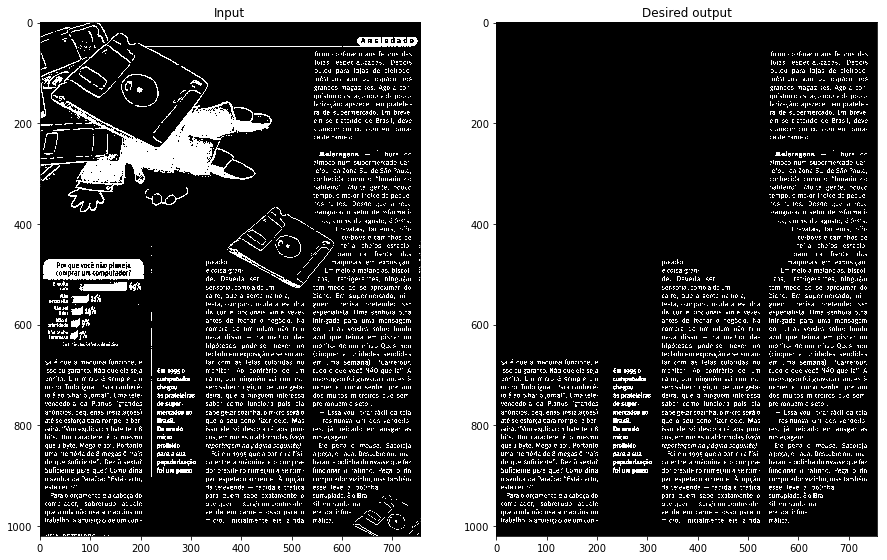

In [2]:
train_imgs = trios.Imageset.read('images/train_images.set')
for i in range(len(train_imgs)):
    print("sample %d:" % (i + 1))
    print("\t input: %s" % train_imgs[i][0])
    print("\t desired output: %s" % train_imgs[i][1])
    print("\t mask: %s\n" % train_imgs[i][2])

print("The first pair of input and ouput examples:")
fig = plt.figure(1, figsize=(15,15))
img=mpimg.imread(train_imgs[0][0])
fig.add_subplot(121)
plt.imshow(img, cmap=cm.gray)
plt.title('Input')
img_gt=mpimg.imread(train_imgs[0][1])
fig.add_subplot(122)
plt.title('Desired output')
plt.imshow(img_gt, cmap=cm.gray)

## Training
We define a CNN architecture through the CNN_TFClassifier class. The classifier requires the input image shape  and number of outputs for initialization. We define the input shape according to the patches extracted from the images, in this example, 11x11, and use a single sigmoid output unit for binary classification: text and non-text classes. Additional (optional) parameters include: 
learning_rate (default 1e-4), dropout_prob (default 0.5), and output_activation=(default 'sigmoid'). 

In [3]:
patch_side = 15
num_outputs = 1
win = np.ones((patch_side, patch_side), np.uint8)
cnn_classifier = CNN_TFClassifier((patch_side, patch_side, 1), num_outputs, num_epochs=10, model_dir='cnn_text_segmentation')

op_tf = trios.WOperator(win, TFClassifier(cnn_classifier), RAWFeatureExtractor, batch=True)
#op_tf.train(train_imgs)

## Applying the operator to a new image

INFO:tensorflow:Restoring parameters from cnn_text_segmentation/graph/model.ckpt-35180


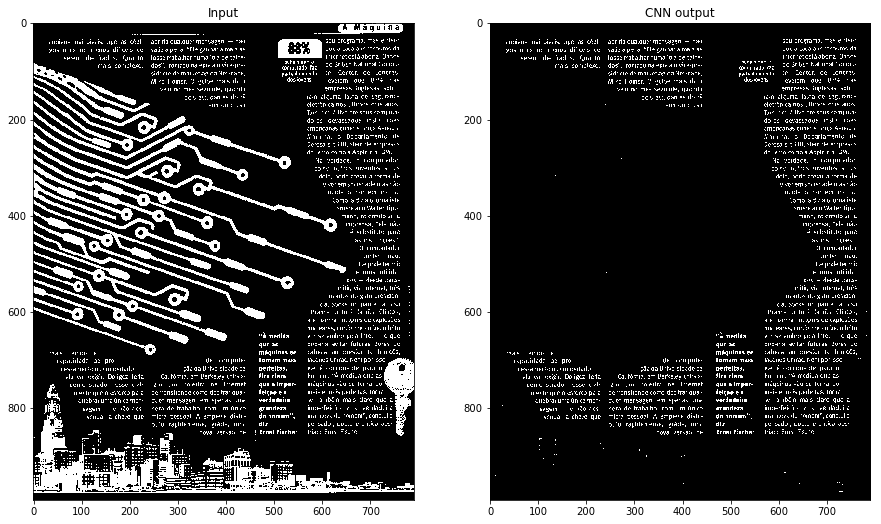

In [4]:
test_img = sp.ndimage.imread('images/veja11.sh50.png', mode='L')
out_img = op_tf.apply(test_img, test_img)

fig = plt.figure(2, figsize=(15,15))
fig.add_subplot(121)
plt.imshow(test_img, cmap=cm.gray)
plt.title('Input')
fig.add_subplot(122)
plt.imshow(out_img, cmap=cm.gray)
plt.title('CNN output')


## Further improvements
The parameters used in this example were selected for illustration only. Better results can be obtained using larger windows, increasing the number of epochs or input-output examples, and trying different CNN architectures/parameters.